<a href="https://colab.research.google.com/github/Manikandan-professional/HeartDiesease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [241]:
a='https://raw.githubusercontent.com/Manikandan-professional/Machine-Learning/main/framingham.csv'
df=pd.DataFrame(pd.read_csv(a))

In [242]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [243]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [244]:
df=df.drop(columns=['education'])
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [245]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [246]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [247]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [248]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [249]:
len(df.columns)

15

In [307]:
df

,age,cigsPerDay,prevalentStroke,sysBP,glucose,TenYearCHD
0,39,0.0,0,106.0,77.000000,0
1,46,0.0,0,121.0,76.000000,0
2,48,20.0,0,127.5,70.000000,0
3,61,30.0,0,150.0,103.000000,1
4,46,23.0,0,130.0,85.000000,0
...,...,...,...,...,...,...
4233,50,1.0,0,179.0,86.000000,1
4234,51,43.0,0,126.5,68.000000,0
4235,48,20.0,0,131.0,86.000000,0
4236,44,15.0,0,126.5,81.966753,0


In [317]:
X=df.iloc[:,:5].values
y=df.iloc[:,5:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [318]:
X

array([[ 39.        ,   0.        ,   0.        , 106.        ,
         77.        ],
       [ 46.        ,   0.        ,   0.        , 121.        ,
         76.        ],
       [ 48.        ,  20.        ,   0.        , 127.5       ,
         70.        ],
       ...,
       [ 48.        ,  20.        ,   0.        , 131.        ,
         86.        ],
       [ 44.        ,  15.        ,   0.        , 126.5       ,
         81.96675325],
       [ 52.        ,   0.        ,   0.        , 133.5       ,
        107.        ]])

In [319]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [320]:
# scale=MinMaxScaler()
# X_train=scale.fit_transform(X_train)
# X_test=scale.fit_transform(X_test)

In [321]:
log=LinearRegression()
log.fit(X_train,y_train)

LinearRegression()

In [322]:
pred=log.predict(X_test)
for i in range(0,len(pred),1):
  if pred[i][0]>0.5:
    pred[i][0]=1
  else:
    pred[i][0]=0

In [323]:
metrics.precision_score(y_test,pred)


0.5

In [324]:
metrics.log_loss(y_test,pred)

5.539240741060883

In [325]:
metrics.f1_score(y_test,pred)

0.0449438202247191

In [296]:
  a=[]
  b=[]
  for i in range(14):
      b.append(df.columns[i])
      a.append(log.coef_[0][i])

In [293]:
log.coef_[0]

array([ 0.0451324 ,  0.24862191, -0.0031299 ,  0.21086558,  0.02260259,
        0.20708979,  0.03713026,  0.09079792,  0.05198053,  0.42124407,
       -0.18642565,  0.05625689,  0.00704166,  0.3335563 ])

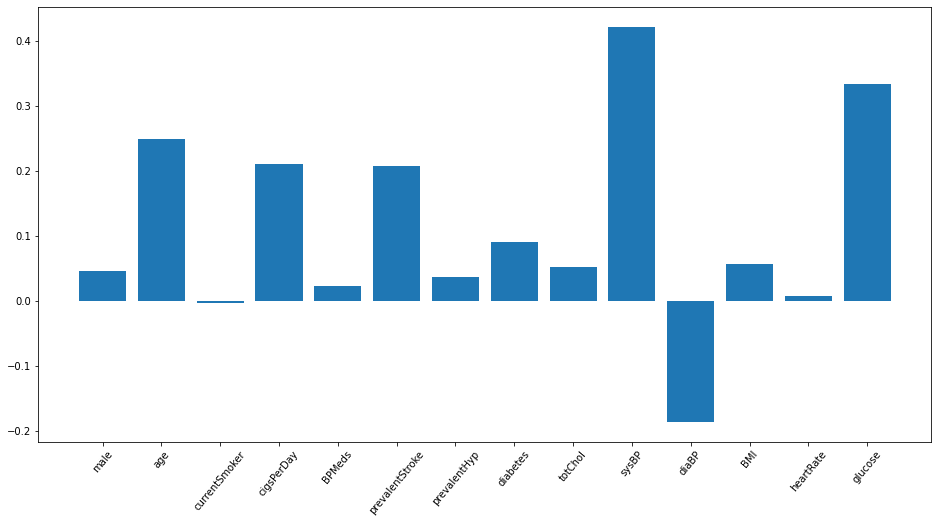

In [300]:
importance = log.coef_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(16,8))
plt.bar(b,a)

plt.xticks(rotation=50)
plt.show()

In [302]:
df=df.drop(columns=['diaBP','currentSmoker','heartRate','male','BPMeds','prevalentHyp','diabetes','totChol','BMI', 'heartRate'],axis=1)

In [301]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')